## Open Source Data Repositories
1. [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) - Small, manageable and standard datasets from almost all domains

2. [USA data.gov Initiative](https://www.data.gov/) - US government open-sourced data. Lots of untapped potential.

3. [World Bank Data](https://data.worldbank.org/) - Econometric, administrative and credit data for almost all countries. Low granularity(less data points), high latency (slow updates).

4. [Quandl](https://www.quandl.com/) - Fianancial and Econometric data. High granularity, low latency(nightly updates).

5. [Kaggle Datasets](https://www.kaggle.com/datasets) - Pretty much everything. Good forum conversations.  

## PIMA Indian Diabetes Data - UCI
You can access the Diabetes Data and its relevant documentation [here on UCI website](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
diabetes = pd.read_csv("/home/sagar/insofe/python_activities/pima_indians_diabetes.csv")
diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
labels = ["Number of times pregnant",
"Plasma glucose concentration",
"Diastolic blood pressure (mm Hg)",
"Triceps skin fold thickness (mm)",
"2-Hour serum insulin (mu U/ml)",
"Body Mass Index",
"Diabetes pedigree function",
"Age (years)",
"Target"]
diabetes = pd.read_csv("/home/sagar/insofe/python_activities/pima_indians_diabetes.csv",names=labels)
diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

## 1. Check if the data types are as expected

In [4]:
diabetes.dtypes

Number of times pregnant              int64
Plasma glucose concentration          int64
Diastolic blood pressure (mm Hg)      int64
Triceps skin fold thickness (mm)      int64
2-Hour serum insulin (mu U/ml)        int64
Body Mass Index                     float64
Diabetes pedigree function          float64
Age (years)                           int64
Target                                int64
dtype: object

In [5]:
diabetes['Target'] = diabetes['Target'].astype('category')

## 2. Memory optimizations

In [6]:
memory = diabetes.memory_usage()
print(memory)
print("Total Memory Usage = ",sum(memory))

Index                                 80
Number of times pregnant            6144
Plasma glucose concentration        6144
Diastolic blood pressure (mm Hg)    6144
Triceps skin fold thickness (mm)    6144
2-Hour serum insulin (mu U/ml)      6144
Body Mass Index                     6144
Diabetes pedigree function          6144
Age (years)                         6144
Target                               784
dtype: int64
Total Memory Usage =  50016


In [7]:
diabetes.iloc[:,1:8] = diabetes.iloc[:,1:8].astype('float16')

In [8]:
memory = diabetes.memory_usage()
print(memory)
print("Total Memory Usage = ",sum(memory))

Index                                 80
Number of times pregnant            6144
Plasma glucose concentration        1536
Diastolic blood pressure (mm Hg)    1536
Triceps skin fold thickness (mm)    1536
2-Hour serum insulin (mu U/ml)      1536
Body Mass Index                     1536
Diabetes pedigree function          1536
Age (years)                         1536
Target                               784
dtype: int64
Total Memory Usage =  17760


## 3. Check summary statistics

In [9]:
diabetes.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,inf,69.125000,20.546875,79.812500,32.000000,0.471924,33.250000
std,3.369578,31.976553,19.358461,15.953056,inf,7.882812,0.331299,11.757976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078003,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.296875,0.243774,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372559,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.593750,0.626221,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,81.000000


In [10]:
diabetes["Target"].value_counts()

0    500
1    268
Name: Target, dtype: int64

## 4. Check for Outliers

<IPython.core.display.Javascript object>


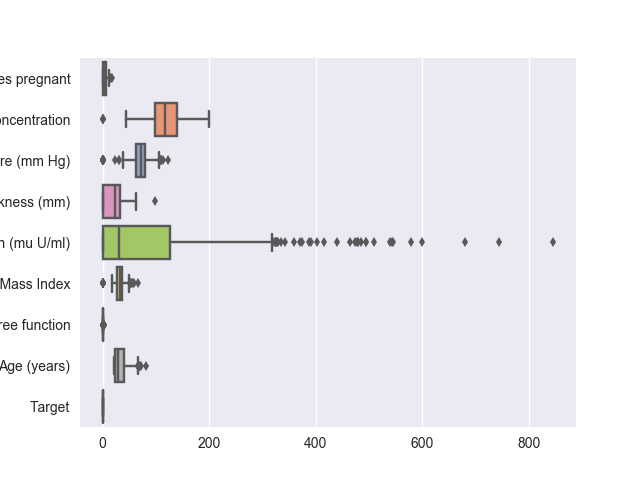

In [11]:
fig, axs = plt.subplots()
sns.boxplot(data=diabetes,orient='h',palette="Set2")
plt.show()

## Dealing with Outliers

In [12]:
q75, q25 = np.percentile(diabetes["2-Hour serum insulin (mu U/ml)"], [75 ,25])
iqr = q75-q25
print("IQR",iqr)
whisker = q75 + (1.5*iqr)
print("Upper whisker",whisker)

IQR 127.25
Upper whisker 318.125


In [13]:
diabetes["2-Hour serum insulin (mu U/ml)"] = diabetes["2-Hour serum insulin (mu U/ml)"].clip(upper=whisker)

<IPython.core.display.Javascript object>


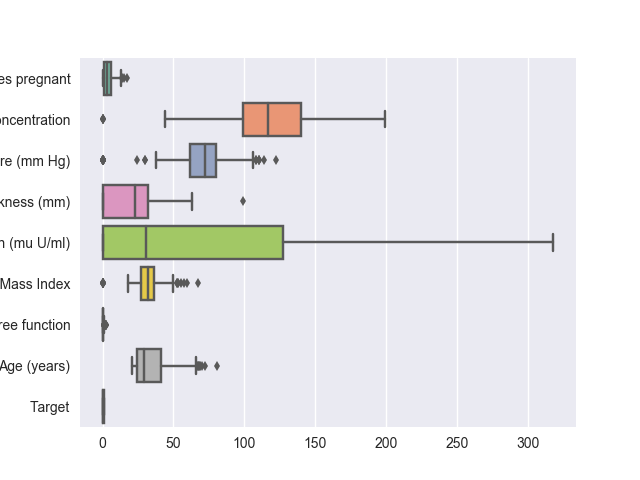

In [14]:
fig, axs = plt.subplots()
sns.boxplot(data=diabetes,orient='h',palette="Set2")
plt.show()

## 5. Check missing values

In [15]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target
0,6,148.0,72.0,35.0,0.0,33.593750,0.626953,50.0,1
1,1,85.0,66.0,29.0,0.0,26.593750,0.351074,31.0,0
2,8,183.0,64.0,0.0,0.0,23.296875,0.671875,32.0,1
3,1,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0
4,0,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1


In [16]:
print((diabetes[[1,2,3,4,5]] == 0).sum())

Plasma glucose concentration          5
Diastolic blood pressure (mm Hg)     35
Triceps skin fold thickness (mm)    227
2-Hour serum insulin (mu U/ml)      374
Body Mass Index                      11
dtype: int64


In [17]:
diabetes.iloc[:,[1,2,3,4,5]] = diabetes[[1,2,3,4,5]].replace(0, np.NaN)
diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target
0,6,148.0,72.0,35.0,NaN,33.593750,0.626953,50.0,1
1,1,85.0,66.0,29.0,NaN,26.593750,0.351074,31.0,0
2,8,183.0,64.0,NaN,NaN,23.296875,0.671875,32.0,1
3,1,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0
4,0,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1


In [18]:
diabetes.isnull().sum()

Number of times pregnant              0
Plasma glucose concentration          5
Diastolic blood pressure (mm Hg)     35
Triceps skin fold thickness (mm)    227
2-Hour serum insulin (mu U/ml)      374
Body Mass Index                      11
Diabetes pedigree function            0
Age (years)                           0
Target                                0
dtype: int64

# Dealing with Missing Values

## A) Drop rows having NaN

In [19]:
print("Size before dropping NaN rows",diabetes.shape,"\n")

nan_dropped = diabetes.dropna()

print(nan_dropped.isnull().sum())
print("\nSize after dropping NaN rows",nan_dropped.shape)

Size before dropping NaN rows (768, 9) 

Number of times pregnant            0
Plasma glucose concentration        0
Diastolic blood pressure (mm Hg)    0
Triceps skin fold thickness (mm)    0
2-Hour serum insulin (mu U/ml)      0
Body Mass Index                     0
Diabetes pedigree function          0
Age (years)                         0
Target                              0
dtype: int64

Size after dropping NaN rows (392, 9)


## Drop row/columns having more than certain percentage of NaNs

In [20]:
diabetes.isnull().mean()

Number of times pregnant            0.000000
Plasma glucose concentration        0.006510
Diastolic blood pressure (mm Hg)    0.045573
Triceps skin fold thickness (mm)    0.295573
2-Hour serum insulin (mu U/ml)      0.486979
Body Mass Index                     0.014323
Diabetes pedigree function          0.000000
Age (years)                         0.000000
Target                              0.000000
dtype: float64

In [21]:
print("Size before dropping NaN rows",diabetes.shape,"\n")

col_dropped = diabetes.loc[:, diabetes.isnull().mean() < .4]
row_dropped = diabetes.loc[diabetes.isnull().mean(axis=1) < .4, :]

print(nan_dropped.isnull().sum())
print("\nSize after dropping Columns with rows",col_dropped.shape)
print("Size after dropping Columns with rows",row_dropped.shape)

Size before dropping NaN rows (768, 9) 

Number of times pregnant            0
Plasma glucose concentration        0
Diastolic blood pressure (mm Hg)    0
Triceps skin fold thickness (mm)    0
2-Hour serum insulin (mu U/ml)      0
Body Mass Index                     0
Diabetes pedigree function          0
Age (years)                         0
Target                              0
dtype: int64

Size after dropping Columns with rows (768, 8)
Size after dropping Columns with rows (761, 9)


## B) Impute missing values
1. Some constant value that is considered "normal" in the domain
2. Summary statistic like Mean, Median, Mode
3. **A value estimated by algorithm or predictive model** - Will be taught later. Don't get ahead of yourself or you'll miss the real fun ;)

In [22]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
mean_imputer.fit(diabetes)
imputed_diabetes = pd.DataFrame(mean_imputer.fit_transform(diabetes),columns=labels)

In [23]:
imputed_diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target
0,6.0,148.0,72.0,35.00000,143.555838,33.593750,0.626953,50.0,1.0
1,1.0,85.0,66.0,29.00000,143.555838,26.593750,0.351074,31.0,0.0
2,8.0,183.0,64.0,29.15342,143.555838,23.296875,0.671875,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.093750,0.166992,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.093750,2.287109,33.0,1.0


### Important Take-Away - *Transformations should be applied in a 2-phase strategy*

## 5. Range Scaling

In [35]:
vector = np.random.chisquare(1,500)
print("Mean",np.mean(vector))
print("SD",np.std(vector))
print("Range",max(vector)-min(vector))

Mean 1.08406560258
SD 1.58967838425
Range 15.991207812


In [36]:
from sklearn.preprocessing import MinMaxScaler
range_scaler = MinMaxScaler()
range_scaler.fit(vector.reshape(-1,1))
range_scaled_vector = range_scaler.transform(vector.reshape(-1,1))
print("Mean",np.mean(range_scaled_vector))
print("SD",np.std(range_scaled_vector))
print("Range",max(range_scaled_vector)-min(range_scaled_vector))

Mean 0.0677882306541
SD 0.0994095257181
Range [ 1.]


## 6. Standardization

In [37]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(vector.reshape(-1,1))
std_scaled_vector = standardizer.transform(vector.reshape(-1,1))
print("Mean",int(np.mean(std_scaled_vector)))
print("SD",int(np.std(std_scaled_vector)))
print("Range",max(std_scaled_vector)-min(std_scaled_vector))

Mean 0
SD 1
Range [ 10.05939816]


## 7. Binning

In [52]:
bins = [0,25,30,35,40,100]

group_names = ['malnutrition', 'Under-Weight', 'Healthy', 'Over-Wight',"Obese"]
diabetes['BMI Class'] = pd.cut(diabetes['Body Mass Index'], bins, labels=group_names)
diabetes.head(10)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target,BMI Class
0,6,148.0,72.0,35.0,NaN,33.593750,0.626953,50.0,1,Healthy
1,1,85.0,66.0,29.0,NaN,26.593750,0.351074,31.0,0,Under-Weight
2,8,183.0,64.0,NaN,NaN,23.296875,0.671875,32.0,1,malnutrition
3,1,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0,Under-Weight
4,0,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1,Obese
5,5,116.0,74.0,NaN,NaN,25.593750,0.201050,30.0,0,Under-Weight
6,3,78.0,50.0,32.0,88.0,31.000000,0.248047,26.0,1,Healthy
7,10,115.0,NaN,NaN,NaN,35.312500,0.134033,29.0,0,Over-Wight
8,2,197.0,70.0,45.0,318.0,30.500000,0.157959,53.0,1,Healthy
9,8,125.0,96.0,NaN,NaN,NaN,0.232056,54.0,1,NaN


## 8. Dummification

In [55]:
dummified_data = pd.concat([diabetes.iloc[:,:-1],pd.get_dummies(diabetes['BMI Class'])],axis=1)
dummified_data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target,malnutrition,Under-Weight,Healthy,Over-Wight,Obese
0,6,148.0,72.0,35.0,NaN,33.593750,0.626953,50.0,1,0,0,1,0,0
1,1,85.0,66.0,29.0,NaN,26.593750,0.351074,31.0,0,0,1,0,0,0
2,8,183.0,64.0,NaN,NaN,23.296875,0.671875,32.0,1,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0,0,1,0,0,0
4,0,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1,0,0,0,0,1


## 9. Reshape

In [31]:
vector.shape

(500,)

In [32]:
row_vector = vector.reshape(-1,1)
row_vector.shape

(500, 1)

In [33]:
col_vector = vector.reshape(1,-1)
col_vector.shape

(1, 500)

In [34]:
matrix = vector.reshape(10,50)
matrix.shape

(10, 50)